#### Analyze the data in hprice1 table. A complete answer will include visualizations in matplotlib, models in statsmodels, and models in sklearn.

I will use visualizations in matplotlib and apply the following models to present Question 1:
1. Linear regression
2. Logistic regression
3. Ridge regression
4. Lasso regression
5. Principle component analysis(PCA)

## Q : Visualizations in matplotlib

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model

In [2]:
plt.style.use('default')

In [3]:
os.chdir('/Users/chiayiyen')
df = pd.read_csv('/Users/chiayiyen/Desktop/0MSBAUTD/2023/6341/csv/hprice1.csv')
df

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630
...,...,...,...,...,...,...,...,...,...,...
83,295.0,318.3,3,6056,1837,1,5.686975,5.762994,8.708805,7.515889
84,236.0,259.4,3,5828,1715,0,5.463832,5.558371,8.670429,7.447168
85,202.5,258.1,3,6341,1574,0,5.310740,5.553347,8.754792,7.361375
86,219.0,232.0,2,6362,1185,0,5.389072,5.446737,8.758098,7.077498


In [70]:
df.describe()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,293.546034,315.736364,3.568182,9019.863636,2013.693182,0.693182,5.633180,5.717994,8.905105,7.572610
std,102.713445,95.314437,0.841393,10174.150414,577.191583,0.463816,0.303573,0.262113,0.544060,0.258688
min,111.000000,198.700000,2.000000,1000.000000,1171.000000,0.000000,4.709530,5.291796,6.907755,7.065613
25%,230.000000,253.900000,3.000000,5732.750000,1660.500000,0.000000,5.438079,5.536940,8.653908,7.414873
50%,265.500000,290.200000,3.000000,6430.000000,1845.000000,1.000000,5.581613,5.670566,8.768719,7.520231
75%,326.250000,352.125000,4.000000,8583.250000,2227.000000,1.000000,5.787642,5.863982,9.057567,7.708266
max,725.000000,708.600000,7.000000,92681.000000,3880.000000,1.000000,6.586172,6.563291,11.436920,8.263591


### Heat Map

<AxesSubplot:>

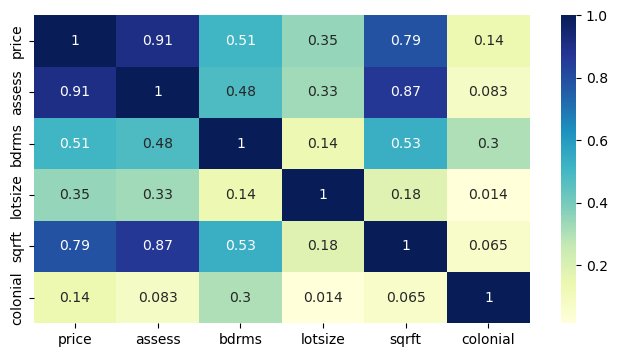

In [71]:
df1 = df.copy()
df1 = df1.drop(['lprice','lassess','llotsize','lsqrft'], axis =1)

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(df1.corr(), annot = True, cmap = "YlGnBu", ax=ax)

# Heat Map shows the correlations among varialbles.
# The stronger the positive correlation between variables, the darker the blue blocks appear:
#  price    : assess(0.91), sqrft(0.79)
#  assess   : price(0.91) , sqrft(0.87)
#  bdrms    : sqrft(0.53)
#  lotsize  : price(0.35)
#  sqrft    : assess(0.87), price(0.79)
#  colonial : bdrms(0.3)

### Scatter Plot

<AxesSubplot:xlabel='price', ylabel='assess'>

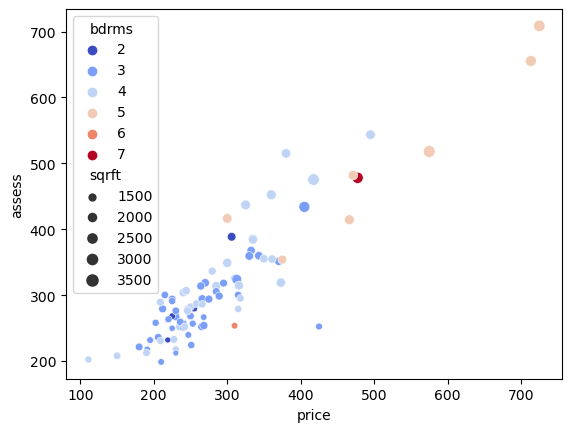

In [72]:
sns.scatterplot(x = "price", y = "assess", data = df, hue = "bdrms", size = "sqrft", palette = "coolwarm")

# In the top-right portion of the graph, we can observe that houses with higher values 
# for both "price" and "assess" have larger house sizes (indicated by bigger dots representing
# "sqrft") and more bedrooms (represented by an increased number of red dots indicating "bdrms").

### Box plot

<AxesSubplot:xlabel='Style', ylabel='price'>

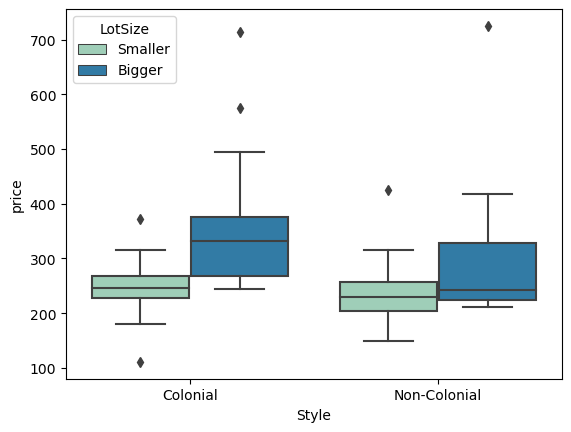

In [73]:
# Convert the "lotsize" variable into binary format: 6430 sqft is the median of "lotsize".
df1['LotSize'] = df1['lotsize'].apply(lambda x: 'Bigger' if x > 6430 else 'Smaller')

# Convert the "colonial" variable into binary format.
df1['Style'] = df1['colonial'].apply(lambda x: 'Colonial' if x == 1 else 'Non-Colonial')

sns.boxplot(x = "Style", y = "price", data = df1, hue = "LotSize", palette = "YlGnBu")

# (1) A larger lot size will result in a higher price.
# (2) Colonial style houses will result in a higher price.

### Bar plot

<AxesSubplot:xlabel='bdrms', ylabel='price'>

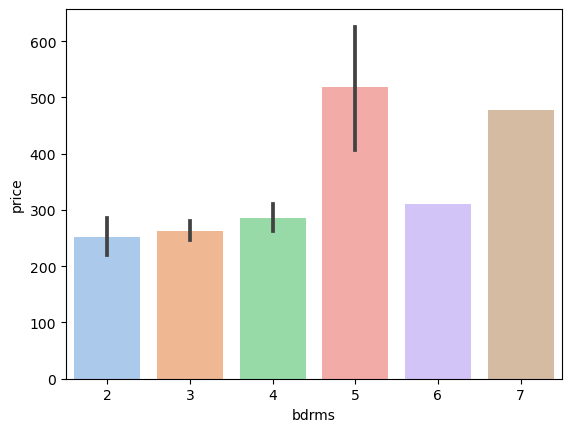

In [74]:
sns.barplot(x = "bdrms", y = "price", data = df1, palette = "pastel")
# The highest priced houses are those with 5 bedrooms, while the lowest priced ones are those with 2 bedrooms.

### Strip Plot

<AxesSubplot:xlabel='bdrms', ylabel='price'>

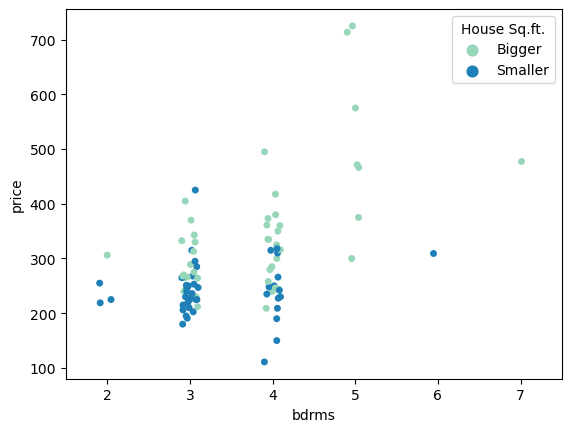

In [75]:
# Convert the "sqrft" variable into binary format: 1845 sqft is the median of "sqrft".
df1['House Sq.ft.'] = df1['sqrft'].apply(lambda x: 'Smaller' if x < 1845 else 'Bigger')

sns.stripplot(x = "bdrms", y = "price", data = df1, hue = "House Sq.ft.", palette = "YlGnBu")

# (1) For properties with the same number of bedrooms, those with a higher price are also the ones 
#     with a larger square footage, as indicated by the light green dots.
# (2) It should be noted that having more bedrooms does not necessarily result in a higher price if 
#     the square footage of the house is small. This can be observed at the bottom of the figure, 
#     where the lower-priced dots for 4 bdrms are compared to those for 3 bdrms.

### Joint Plot

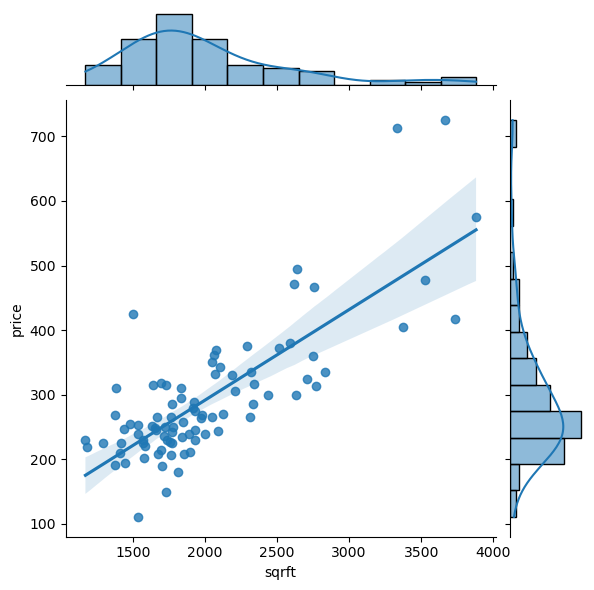

In [76]:
sns.jointplot(x = "sqrft", y = "price", data = df1, kind = "reg")

# The plot displays a regression line between the price and square footage of houses, 
# indicating a positive correlation between these two variables.

##  Q : Models in statsmodels

## Regression

In [77]:
y = df['price']
X = df.copy()
X = df.drop(['price','lprice','lassess','llotsize','lsqrft'], axis=1)
X['const'] = 1.0

In [78]:
linregr1 = sm.OLS(y, X).fit()
print(linregr1.summary())

# (1) The result shows that approximately 83% of the variation in the "price" can be explained 
#     by the independent variables included in the linear regression model. 
# (2) The variable that is statistically significant at the 0.05 level is: "assess".

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     80.56
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           3.59e-30
Time:                        18:00:52   Log-Likelihood:                -453.78
No. Observations:                  88   AIC:                             919.6
Df Residuals:                      82   BIC:                             934.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
assess         0.9041      0.104      8.671      0.0

## Logistic regression

In [113]:
dflr = df.copy()

In [114]:
# Convert the "price" variable into binary format: 265 sqft is the median of "price".
dflr['price_binary'] = dflr['price'].apply(lambda x: 1 if x > 265 else 0)

# Address the Singular matrix issue by excluding: 'lprice','lassess','llotsize','lsqrft'.
mod = smf.logit('price_binary~assess+bdrms+lotsize+sqrft+colonial',data = dflr)
res = mod.fit()
print(res.summary())

# The result shows that "assess" is still the most significant variable.

Optimization terminated successfully.
         Current function value: 0.300410
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           price_binary   No. Observations:                   88
Model:                          Logit   Df Residuals:                       82
Method:                           MLE   Df Model:                            5
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.5666
Time:                        18:03:10   Log-Likelihood:                -26.436
converged:                       True   LL-Null:                       -60.997
Covariance Type:            nonrobust   LLR p-value:                 1.561e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.8640      4.557     -4.140      0.000     -27.795      -9.933
assess         0.0590      0.

## Q : Models in sklearn

## Ridge Regression

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
X = df.drop(['price'], axis = 1)
y = df['price']

clf = Ridge(alpha = 1.0)
clf.fit(X, y)

Ridge()

In [117]:
clf.coef_

array([ 6.47998526e-01,  7.42184081e+00,  5.81175153e-04,  9.80882362e-03,
        3.77264669e-01,  1.62538772e+02, -4.63797186e+01, -7.41719334e+00,
       -3.30009033e+01])

In [118]:
clf.intercept_

-297.24614382405616

In [119]:
lm.coef_

array([ 1.23304328e+00,  2.65206573e+00,  3.45239232e-05,  8.14632004e-03,
       -4.10046110e-01,  2.76094173e+02, -3.96819396e+02,  1.75482492e+00,
       -3.95321970e+00])

In [120]:
lm.intercept_

606.3668534382923

In [121]:
clf.predict(X)

array([319.97294845, 348.26247731, 184.70675215, 194.23434526,
       339.85266007, 431.4971009 , 339.59261464, 300.10849179,
       200.11190227, 236.81645838, 294.29642571, 361.74971575,
       403.12643728, 223.6152896 , 261.75747149, 224.99565091,
       262.78964494, 285.6385433 , 262.09799778, 315.89207378,
       267.7767175 , 280.653673  , 241.88598767, 144.53631543,
       233.80952301, 273.06346836, 230.78811322, 340.41068438,
       484.26716424, 348.79280158, 220.59365283, 353.70395697,
       228.81528678, 235.69670985, 353.68419673, 187.12793991,
       402.11113425, 521.72783808, 234.38032089, 224.43459896,
       249.94344378, 637.46035458, 255.85638497, 215.68450156,
       366.49693058, 247.8662668 , 315.77704714, 438.6047792 ,
       245.8671115 , 297.9387178 , 276.02537912, 249.33277079,
       191.99444344, 171.65970969, 246.24368853, 261.17119172,
       208.98618501, 267.40651375, 283.85828427, 311.29703898,
       241.52282939, 274.43470439, 301.95910931, 469.97

In [122]:
clf.predict(X).mean()

293.5460340909091

In [123]:
lm.predict(X).mean()

293.54603409090885

In [124]:
clf.predict(X).var()

9223.233577859895

In [125]:
lm.predict(X).var()

10282.185880371808

In [126]:
clf = linear_model.RidgeCV(alphas=np.linspace(0.1,500,1000),store_cv_values=True,cv=None)
clf.fit(X,y)

RidgeCV(alphas=array([1.00000000e-01, 6.00400400e-01, 1.10080080e+00, 1.60120120e+00,
       2.10160160e+00, 2.60200200e+00, 3.10240240e+00, 3.60280280e+00,
       4.10320320e+00, 4.60360360e+00, 5.10400400e+00, 5.60440440e+00,
       6.10480480e+00, 6.60520521e+00, 7.10560561e+00, 7.60600601e+00,
       8.10640641e+00, 8.60680681e+00, 9.10720721e+00, 9.60760761e+00,
       1.01080080e+01, 1.06084084e+0...
       4.88490791e+02, 4.88991191e+02, 4.89491592e+02, 4.89991992e+02,
       4.90492392e+02, 4.90992793e+02, 4.91493193e+02, 4.91993594e+02,
       4.92493994e+02, 4.92994394e+02, 4.93494795e+02, 4.93995195e+02,
       4.94495596e+02, 4.94995996e+02, 4.95496396e+02, 4.95996797e+02,
       4.96497197e+02, 4.96997598e+02, 4.97497998e+02, 4.97998398e+02,
       4.98498799e+02, 4.98999199e+02, 4.99499600e+02, 5.00000000e+02]),
        store_cv_values=True)

In [127]:
clf.coef_

array([ 8.70182474e-01,  4.57359080e+00,  2.66885385e-04,  3.14329372e-02,
       -6.16599144e-01,  2.48156490e+02, -2.22083256e+02, -3.47825815e+00,
       -7.06904435e+01])

In [128]:
clf.intercept_

375.4480360048375

In [129]:
clf.alpha_

0.1

In [130]:
lm.coef_

array([ 1.23304328e+00,  2.65206573e+00,  3.45239232e-05,  8.14632004e-03,
       -4.10046110e-01,  2.76094173e+02, -3.96819396e+02,  1.75482492e+00,
       -3.95321970e+00])

In [131]:
lm.intercept_

606.3668534382923

In [132]:
clf.predict(X)

array([308.58697051, 355.94491285, 190.53575472, 192.27895405,
       356.71239115, 442.17314034, 333.659151  , 309.04554989,
       201.5753787 , 239.64868809, 288.70157067, 333.06030075,
       409.70768551, 207.89682026, 262.41925763, 231.50377408,
       245.57142777, 284.33238634, 271.3219815 , 312.43842282,
       264.673935  , 271.14800964, 225.15764018, 131.70424663,
       249.30482999, 273.79385672, 227.18847657, 339.28100739,
       487.72149044, 347.72915963, 237.44916455, 347.12007201,
       252.58261574, 236.89988333, 355.34710104, 190.75078505,
       386.71987802, 545.74654531, 209.5153679 , 222.44755084,
       246.14791914, 661.40531146, 252.27172095, 242.43774905,
       369.33797073, 262.40625449, 316.22137395, 442.72786876,
       253.99768823, 312.30831741, 265.46983187, 253.03365991,
       216.5628605 , 168.58056085, 248.50670012, 254.09935998,
       210.59154671, 261.53619959, 286.10884306, 315.20285505,
       226.62756634, 271.02726123, 320.86680939, 469.14

In [133]:
clf.predict(X).mean()

293.5460340909089

In [134]:
lm.predict(X).mean()

293.54603409090885

In [135]:
clf.predict(X).var()

9972.105808882454

In [136]:
lm.predict(X).var()

10282.185880371808

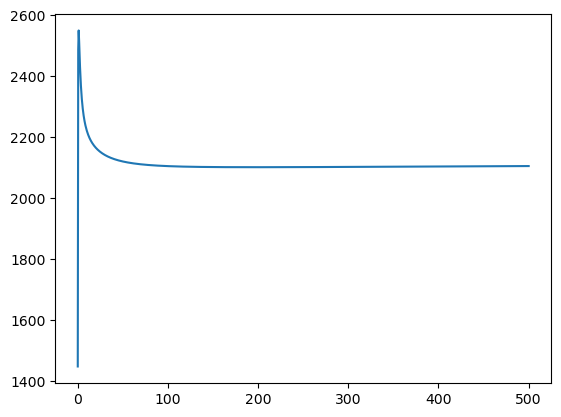

In [137]:
plt.plot(np.linspace(0.1,500,1000),clf.cv_values_.mean(0))

## Lasso Regression

In [13]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X, y)

Lasso(alpha=0.1)

In [14]:
clf.coef_

array([ 1.12893685e+00,  3.05007801e+00,  1.20151390e-04,  4.47031997e-03,
       -4.47432559e-01,  2.67458869e+02, -3.45323034e+02,  0.00000000e+00,
       -0.00000000e+00])

In [15]:
clf.intercept_

384.35183192204533

In [16]:
lm = linear_model.LinearRegression()
lm.fit(X,y)

LinearRegression()

In [17]:
lm.coef_

array([ 1.23304328e+00,  2.65206573e+00,  3.45239232e-05,  8.14632004e-03,
       -4.10046110e-01,  2.76094173e+02, -3.96819396e+02,  1.75482492e+00,
       -3.95321970e+00])

In [18]:
lm.intercept_

606.3668534382923

In [19]:
lm.predict(X)

array([302.82562346, 356.97641093, 194.57684333, 192.53143691,
       362.110262  , 442.49958917, 329.32823913, 308.85363643,
       208.42715824, 242.28309541, 286.73040142, 320.10364535,
       409.10689694, 203.87895116, 266.31073784, 238.40403929,
       238.07188022, 281.33048256, 267.71484807, 307.45439993,
       264.45227367, 268.22084598, 217.1300216 , 138.64799817,
       255.62128138, 273.56675403, 229.25937602, 336.93183263,
       481.44158582, 344.5214447 , 248.99424592, 343.61383495,
       267.48647449, 241.36730958, 352.94088903, 200.03337779,
       380.91801527, 548.69987785, 200.25475309, 217.98341911,
       243.24000335, 681.90038864, 249.37934447, 248.32959395,
       366.81663641, 271.77501259, 309.7835882 , 437.1482557 ,
       255.5552748 , 313.98853907, 260.85281136, 251.49695389,
       233.3203139 , 178.36682812, 250.82186604, 250.11661127,
       216.50497657, 258.76532854, 286.31969683, 315.51929204,
       216.82401918, 265.84946958, 319.64833078, 469.20

In [20]:
lm.predict(X).mean()

293.54603409090885

In [21]:
clf = linear_model.LassoCV()
clf.fit(X,y)

LassoCV()

In [22]:
clf.coef_

array([ 0.76032278,  0.        ,  0.00087578,  0.02759866,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ])

In [23]:
clf.intercept_

-9.990200875643382

In [24]:
clf.mse_path_

array([[  5560.18993016,   5546.53215737,  18453.34181092,
          6520.23316232,  16243.19825006],
       [  5511.96774959,   5491.47024322,  18453.34181092,
          6454.65030015,  16243.19825006],
       [  5467.90223051,   5440.84006689,  18453.34181092,
          6394.25917645,  16243.19825006],
       [  5427.59513605,   5394.24906578,  18405.0006983 ,
          6338.60937422,  16243.19825006],
       [  5390.69045074,   5351.34336247,  18209.77346055,
          6287.29392478,  16243.19825006],
       [  5356.86953149,   5311.80356473,  18029.32181149,
          6239.94467421,  15402.66068386],
       [  5325.84684627,   5275.34105615,  17862.43918939,
          6196.22818435,  15140.62193925],
       [  5297.366227  ,   5241.69471713,  17708.02779938,
          6155.84210309,  16057.17693403],
       [  5271.19757239,   5210.62802382,  17565.0877077 ,
          6118.51194738,  17921.67968694],
       [  5247.13394463,   5181.92647907,  17432.7071367 ,
          6083.98824918

In [25]:
clf.mse_path_.mean(1)

array([10464.69906216, 10430.92567079, 10399.90830696, 10361.73050488,
       10296.45988972, 10068.12005316,  9960.09544308, 10092.02155613,
       10417.42098765, 10896.8960799 , 11497.13762771, 12190.06736177,
       12952.09647063, 13763.48475451, 14607.78703016, 15471.37516757,
       16343.02566975, 17213.56403694, 18075.55831238, 18923.05521096,
       19751.35310455, 20556.8068957 , 21336.66047003, 22088.90298921,
       22812.14578341, 23505.51703326, 24168.57180597, 24801.21533549,
       25403.63771866, 25973.68200167, 26256.99815145, 26547.34163609,
       26842.64687317, 27139.38440885, 27434.67882119, 27501.057756  ,
       27519.55922539, 27566.75075947, 27513.55081884, 26128.6179905 ,
       24881.67056281, 23757.84427004, 22743.75083266, 21827.5672977 ,
       20998.84420324, 20249.00803152, 19568.47783846, 18950.73163672,
       18389.33451228, 17878.57207591, 17413.36471465, 16989.19229341,
       16602.02816683, 16248.28132209, 15924.74562499, 15628.55527322,
      

In [26]:
clf.mse_path_.mean(1).argmin()

99

In [27]:
clf.alpha_

358.63054269783066

In [28]:
clf.alphas_[clf.mse_path_.mean(1).argmin()]

358.63054269783066

In [29]:
clf.predict(X)

array([328.08906766, 323.23096277, 198.00670377, 210.24408554,
       307.34973319, 388.67226673, 334.58500331, 271.47059656,
       223.5435436 , 239.5747628 , 298.47632597, 385.55075736,
       423.85233164, 260.43537142, 278.11993628, 218.8128115 ,
       281.37957252, 277.56267262, 235.70481373, 296.05205992,
       275.10640634, 297.85137018, 267.74852307, 200.52765742,
       220.25550325, 272.29588314, 252.51723211, 329.28434455,
       458.27237733, 325.31637091, 203.22981068, 374.02275496,
       210.58315753, 237.90677094, 324.7492408 , 201.61655346,
       419.41517864, 504.70783868, 266.82014473, 240.84699343,
       253.15836619, 604.98074066, 249.68367269, 188.23832541,
       328.26036903, 237.23209965, 313.62325592, 461.67343912,
       232.77556695, 253.3312455 , 288.91225554, 256.90952501,
       184.4516331 , 213.69965907, 248.9706687 , 258.70081964,
       216.52081162, 264.9944484 , 275.55288497, 298.72197391,
       261.13700955, 258.49321288, 225.76309148, 442.57

In [30]:
clf.predict(X).mean()

293.5460340909091

In [31]:
lm.predict(X).mean()

293.54603409090885

In [32]:
clf.predict(X).var()

7968.019601057265

In [33]:
lm.predict(X).var()

10282.185880371808

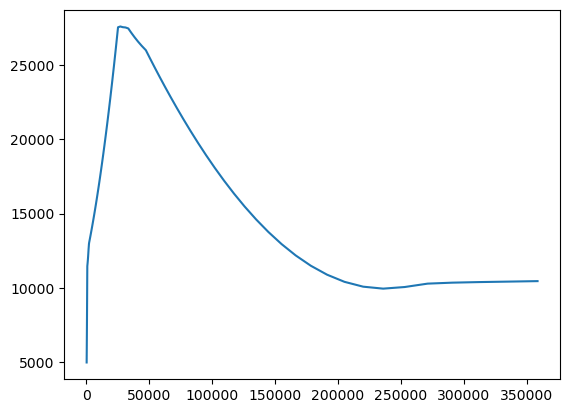

In [34]:
plt.plot(clf.alphas_,clf.mse_path_.mean(1))

## Principle Component Analysis (PCA)

In [86]:
import os
from numpy.linalg import eigh
import sklearn.preprocessing as prep
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer

In [87]:
# Create a copy of the dataset and keep only "lassess, bdrms, llotsize, lsqrft, colonial" variables.
dfpca = df.copy()
dfpca = dfpca.drop(['price','assess','lotsize','sqrft','lprice'], axis = 1)

In [88]:
#standardize the data
sc = prep.StandardScaler()
sX = pd.DataFrame(sc.fit_transform(dfpca), columns = dfpca.columns)
# StandardScaler uses the population variance/standard deviation
# calculate the sample standard deviation of the result and scale by dividing with it 
sc.scale_ = np.std(sX, axis = 0, ddof = 1).to_list()
sX = sX/sc.scale_

In [89]:
#create pca object
#not specifying the number of components results in all variables being used
pcaall = PCA()
#pass the feature set 
#fit calculates parameters; transform applies the transformation
pcsall = pcaall.fit_transform(sX)

In [37]:
print('\nEigen Values of Correlation Matrix')
print(pcaall.explained_variance_)


Eigen Values of Correlation Matrix
[2.55337442 1.09675786 0.77276926 0.48668841 0.09041005]


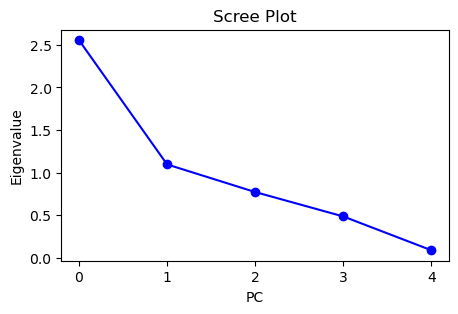

In [93]:
eigenvalues = pcaall.explained_variance_

num_components = len(eigenvalues)
ind = np.arange(num_components)
plt.figure(figsize=(5, 3))
plt.plot(ind, eigenvalues, 'bo-')
plt.xlabel('PC')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.xticks(ind)
plt.show()

In [38]:
expldvarpcaall = pcaall.explained_variance_ratio_
expldvarpcaall

array([0.51067488, 0.21935157, 0.15455385, 0.09733768, 0.01808201])

In [39]:
expldvarsumall = np.cumsum(expldvarpcaall)
print('\nCumulative sum of the explained variance')
print(expldvarsumall)

# PC1 & PC2        satisfy the threshold 70%.
# PC1 & PC2 & PC3  satisfy the threshold 80%.


Cumulative sum of the explained variance
[0.51067488 0.73002646 0.88458031 0.98191799 1.        ]


In [40]:
pcsalldf = pd.DataFrame(pcsall, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
print(pcsalldf) 

         PC1       PC2       PC3       PC4       PC5
0   0.999779 -0.692754 -0.415596 -0.444265  0.083052
1   0.485264  0.098896  0.828137 -0.787400 -0.067252
2  -2.275272  0.833506 -0.463109  0.664855 -0.071768
3  -1.734262 -0.900611  0.349249 -0.248694 -0.129449
4   0.862694 -0.757083 -0.451606 -0.394611  0.407078
..       ...       ...       ...       ...       ...
83 -0.332768 -0.378885  0.349681 -0.794051 -0.307009
84 -1.333364  1.120986 -0.636364  0.202343  0.035837
85 -1.470809  1.153576 -0.405993  0.390967 -0.124779
86 -2.826652  1.467065  0.382222  0.067381 -0.470700
87 -0.550504 -1.199740 -0.223185  0.271160  0.115016

[88 rows x 5 columns]


### Run linear regression using all PCs.

In [41]:
# Join dfpca with pcsalldf, remove dependent variable
allpclr = pd.concat([dfpca, pcsalldf], axis = 1)

In [42]:
linregr5 = sm.OLS(y, allpclr).fit()
print(linregr5.summary())

# In this regression, we get a R-square = 0.782 and Adj. R-square = 0.768. 
# The variables that were statistically significant at the 0.05 level were:
# bdrms(0.004), lassess(0.000), llotsize(0.000), lsqrft(0.047), PC1(0.000), PC2(0.002), PC4(0.016), PC5(0.001)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     58.72
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.15e-25
Time:                        15:59:46   Log-Likelihood:                -465.01
No. Observations:                  88   AIC:                             942.0
Df Residuals:                      82   BIC:                             956.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bdrms          9.3301      3.148      2.964      0.0

### Run regressions using the number of principal components based on Kaiser’s Rule and “explained variance” thresholds of 70% (using PC1 and PC2)

In [43]:
pc2lr = allpclr.copy()

In [44]:
pc2lr = pc2lr.drop(['PC3','PC4','PC5'], axis = 1)

In [46]:
lrpc2 = sm.OLS(y, pc2lr).fit()
print(lrpc2.summary())

# With only PC1 and PC2, this regression get the SAME R-square and Adj. R-square as the previous regression. 
# The variables that were statistically significant at the 0.05 level were:
# colonial(0.011), lassess(0.000), llotsize(0.035), lsqrft(0.008), PC1(0.000), PC2(0.000)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     58.72
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.15e-25
Time:                        16:00:55   Log-Likelihood:                -465.01
No. Observations:                  88   AIC:                             942.0
Df Residuals:                      82   BIC:                             956.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bdrms          8.4088      9.968      0.844      0.4